In [20]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [21]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

### Prepare the data

In [22]:
from helpers import standardize

def prepare(x):
    """
    Prepare the data by standardizing and replacing unused 
    values (-999) by the mean of their columns such that they
    don't affect the computation then.
    """
    # Here we put the non sense values (-999) to 0 or mean 
    # such that they don't affect too much the prediction then
    xt = np.copy(x.T)
    for xi in xt:
        xi[xi==-999] = np.nan
        m = np.nanmean(xi)
        nanidx = np.where(np.isnan(xi))
        xi[nanidx] = m
        
    tx, mean, std = standardize(xt.T)
    
    return tx        


tx = prepare(tX)

### Exploratory data analysis

In [23]:
rows, features = tx.shape
print('Number of data entries:', rows)
print('Number of feature:', features)
print(tx.shape)
print(tx[:, 1].shape)
print(y)

Number of data entries: 250000
Number of feature: 31
(250000, 31)
(250000,)
[ 1. -1. -1. ...,  1. -1. -1.]


[ 1.  1.  1. ...,  1.  1.  1.]


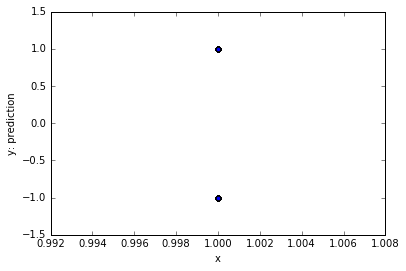

In [24]:
plt.rcParams['agg.path.chunksize'] = 10000
feature1 = tx[:, 0]
print(feature1)
plt.scatter(feature1, y)
plt.xlabel('x')
plt.ylabel('y: prediction')
plt.show()

In [25]:
for f in range(0, 0):
    featureData = tx[:, f]
    plt.scatter(featureData, y)
    plt.xlabel('x')
    plt.ylabel('y: prediction')
    plt.show()

### Exploratory data comments

For feature : 

    4-  > 40 =>  1
    5-  > 6  =>  1
    
    1-  > 20 => -1 [10,20] => more likely to be -1
    3-  > 20 => -1
    21- > 10 => -1
    26- > 22 => -1
    29- > 13 => -1
    

## Process the Machine Learning

#### Differents learning methods

In [26]:
from least_squares import *
from regression import *

def learn_with(method, y, tx, gamma=0.05, max_iters=10, lambda_=0.1):
    
    initial_w, loss = least_squares(y, tx)
    
    if method == 'least_square_GD': 
        return least_squares_GD(y, tx, initial_w, max_iters, gamma)

    if method == 'least_square_SGD': 
        return least_squares_SGD(y, tx, initial_w, max_iters, gamma)

    if method == 'logistic_regression': 
        return logistic_regression(y, tx, initial_w, max_iters, gamma)

    if method == 'reg_logistic_regression': 
        return reg_logisitic_regression(y, tx, lambda_, initial_w, max_iters, gamma)
    
    if method == 'ridge_regression': 
        return ridge_regression(y, tx, lambda_)
    
    return initial_w, loss

#### Training phase

In [27]:
def compare_least_squares(y, tx):
    w3, l3 = learn_with("least_square", y, tx)
    w2, l2 = learn_with("least_square_GD", y, tx, 0.15, 50)
    w1, l1 = learn_with("least_square_SGD", y, tx, 0.5, 50)
    print("SGD")
    print(l1)
    print(w1)
    print("GD")
    print(l2)
    print(w2)
    print("--")
    print(l3)
    print(w3)
    

In [28]:
def compare_regression(y, tx):
    w1, l1 = learn_with('logistic_regression', y, tx)
    print("Log reg")
    print(l1)
    print(w1)
    #print(compute_loss(y, tx, w1))
    w2, l2 = learn_with('reg_logistic_regression', y, tx, 0.05, 200, 0.01)
    print("Reg Log reg")
    print(l2)
    print(w2)
    #print(compute_loss(y, tx, w2))
    w3, l3 = learn_with("ridge_regression", y, tx)
    print("Ridge reg")
    print(calculate_nll(y, tx, w3))
    #print(l3)
    print(w3)

In [29]:
compare_regression(y, tx)

Log reg
65048.4550857
[ -1.08131625e+05   7.33879071e+02  -3.52269319e+04  -9.92863196e+02
   1.27173396e+04   1.24665933e+04   1.19225391e+04  -1.07681765e+04
   7.05672498e+03  -3.48333001e+03   7.65968928e+03  -1.91096163e+04
   2.47876446e+04   1.26680094e+04   1.94387174e+04  -1.12274199e+02
  -5.30804881e+02  -4.34158198e+03   1.28255138e+02   4.06323471e+02
  -2.79558770e+03   6.62537008e+02   6.78547000e+03   7.50895687e+03
   2.49609491e+03  -1.51242094e+00  -8.89434919e+00  -3.75711947e+03
   9.81554724e+01  -2.56636300e+02   6.27117378e+03]
Iter 0 loss = -0.118402858539
Iter 100 loss = 7.47548449906
Reg Log reg
31.9073052643
[ -2.69910161e+01   4.95257513e-02  -1.09105528e+01  -1.12427494e+01
   2.27598925e+00   1.22048205e+00   1.90969102e+00   6.69092593e-01
   1.28981052e+01  -8.48448243e-01   2.15333792e+00  -9.90215640e+00
   5.12505548e+00   2.87887456e+00   5.30097634e+00  -1.66304761e-02
  -2.74645041e-02   1.22540323e+01  -3.45047683e-02   8.23562595e-02
   2.613827

Step 1 over 30
Step 2 over 30
Step 3 over 30
Step 4 over 30
Step 5 over 30
Step 6 over 30
Step 7 over 30
Step 8 over 30
Step 9 over 30
Step 10 over 30
Step 11 over 30
Step 12 over 30
Step 13 over 30
Step 14 over 30
Step 15 over 30
Step 16 over 30
Step 17 over 30
Step 18 over 30
Step 19 over 30
Step 20 over 30
Step 21 over 30
Step 22 over 30
Step 23 over 30
Step 24 over 30
Step 25 over 30
Step 26 over 30
Step 27 over 30
Step 28 over 30
Step 29 over 30
Step 30 over 30
30
30
30


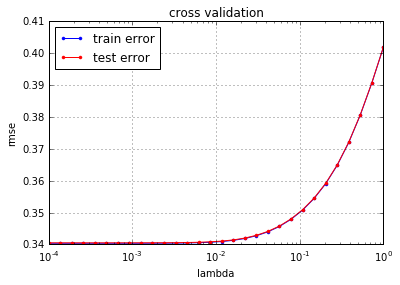

In [41]:
def train(y, tx):
    
    w, loss = learn_with("least_square_GD", y, tx)
    
    return w, loss

#loss, weights = train(y, tx)
#compare_least_squares(y, tx)
#compare_regression(y, tx)
#w, l = least_squares(y, tx)
#print(calculate_nll(y, tx, w))

from cross_validation import cross_validation_demo

initial_w = np.zeros((tx.shape[1]))
gamma = 0.5

cross_validation_demo(y, tx, initial_w, gamma)

Maybie a problem with loss computation ? To what should we go ? Here loss is going to inf or -inf depending on the lambdas and gamma..

## Generate predictions and save ouput in csv format for submission:

In [19]:
weights, loss = least_squares(y, tx)
print(weights)

NameError: name 'cross_validation_demo' is not defined

In [17]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


tx_Test_norm = prepare(tX_test)


In [18]:
OUTPUT_PATH = '../output/out.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tx_Test_norm)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)